In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

from pathlib import Path 
import os

In [8]:
from pathlib import Path
data_path = Path("../data/MetroPT3(AirCompressor).csv")
print(data_path.resolve())

C:\Users\MSI\Desktop\Ml bassem\Mlops\data\MetroPT3(AirCompressor).csv


In [9]:
data_path=Path("C:/Users/MSI/Desktop/Ml bassem/Mlops/data/MetroPT3(AirCompressor).csv")

data=pd.read_csv(data_path)

In [10]:
from sklearn.preprocessing import StandardScaler
# Drop non-numeric column
df_numeric = data.drop(['timestamp', 'Unnamed: 0'], axis=1)

# Normalize the data
#scaler = StandardScaler()
#df_scaled = scaler.fit_transform(df_numeric)

In [11]:
# Mean 
X_mean = df_numeric.mean() 
# Standard deviation 
X_std = df_numeric.std() 
# Standardization 
Z = (df_numeric - X_mean) / X_std
# covariance 
c = Z.cov()
print(X_mean,X_std, Z, c )

TP2                 1.367826
TP3                 8.984611
H1                  7.568155
DV_pressure         0.055956
Reservoirs          8.985233
Oil_temperature    62.644182
Motor_current       2.050171
COMP                0.836957
DV_eletric          0.160611
Towers              0.919848
MPG                 0.832664
LPS                 0.003420
Pressure_switch     0.991437
Oil_level           0.904156
Caudal_impulses     0.937107
dtype: float64 TP2                3.250930
TP3                0.639095
H1                 3.333200
DV_pressure        0.382402
Reservoirs         0.638307
Oil_temperature    6.516261
Motor_current      2.302053
COMP               0.369405
DV_eletric         0.367172
Towers             0.271528
MPG                0.373276
LPS                0.058381
Pressure_switch    0.092141
Oil_level          0.294378
Caudal_impulses    0.242771
dtype: float64               TP2       TP3        H1  DV_pressure  Reservoirs  \
0       -0.424440  0.584247  0.531575    -0.20909

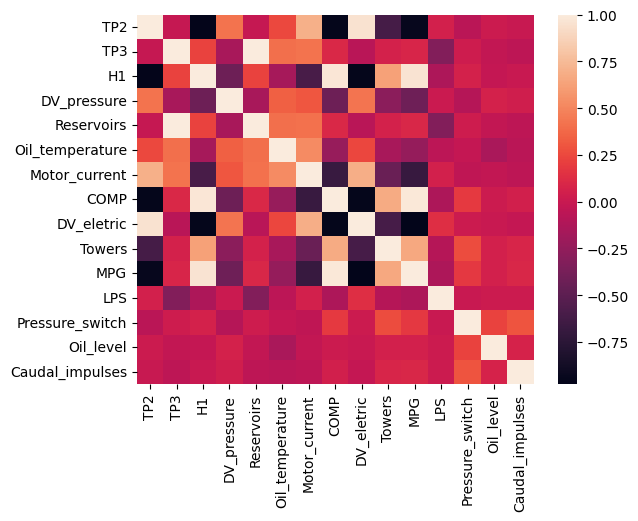

In [12]:
sns.heatmap(c) 
plt.show()

Compute Eigenvalues and Eigenvectors of Covariance Matrix to Identify Principal Components
Let A be a square nXn matrix and X be a non-zero vector for which 

A
X
=
λ
X
AX=λX

for some scalar values 
λ
λ. then 
λ
λ is known as the eigenvalue of matrix A and X is known as the eigenvector of matrix A for the corresponding eigenvalue.

It can also be written as :

A
X
−
λ
X
=
0
(
A
−
λ
I
)
X
=
0
AX−λX
(A−λI)X
​
  
=0
=0
​


In [13]:
eigenvalues, eigenvectors = np.linalg.eig(c) 
print('Eigen values:\n', eigenvalues) 
print('Eigen values Shape:', eigenvalues.shape) 
print('Eigen Vector Shape:', eigenvectors.shape)

Eigen values:
 [6.17000585e+00 2.67751929e+00 1.44709082e+00 1.00676515e+00
 9.07006775e-01 9.43852013e-01 7.08976239e-01 4.68408315e-01
 3.83034203e-01 1.94392814e-01 6.27843079e-02 1.87741737e-02
 8.61011068e-03 2.77500019e-03 4.93319299e-06]
Eigen values Shape: (15,)
Eigen Vector Shape: (15, 15)


In [14]:
# Sort the eigenvalues in descending order and sort the corresponding eigenvectors accordingly.
idx = eigenvalues.argsort()[::-1]
 # Sort the eigenvalues in descending order 
eigenvalues = eigenvalues[idx]
 # sort the corresponding eigenvectors accordingly 
eigenvectors = eigenvectors[:,idx]

# Explained variance is the term that gives us an idea of the amount of the total variance which has been retained by 
# selecting the principal components instead of the original feature space.

In [15]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues) 
explained_var

array([0.41133372, 0.58983501, 0.68630773, 0.75342541, 0.81634888,
       0.87681599, 0.92408108, 0.9553083 , 0.98084391, 0.99380343,
       0.99798905, 0.99924066, 0.99981467, 0.99999967, 1.        ])

In [16]:
n_components = np.argmax(explained_var >= 0.50) + 1 
print(f"Number of principal components: {n_components}")
# consider the number of principal components of any value of our choice or by limiting the explained variance. 
# Here I am considering explained variance more than equal to 50%.

Number of principal components: 2


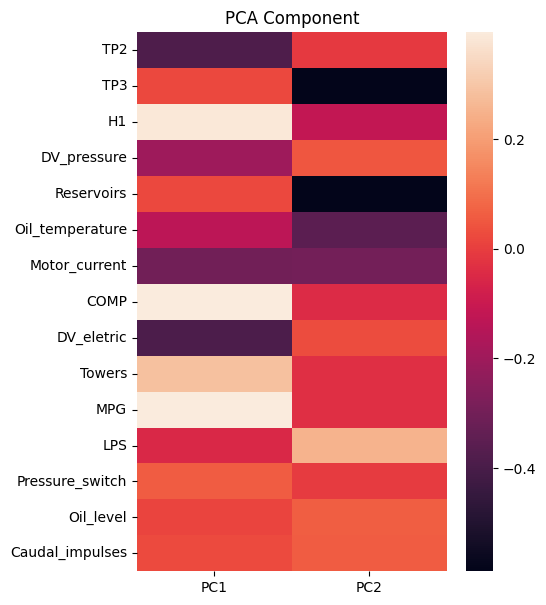

In [17]:
# PCA component or unit matrix 
u = eigenvectors[:,:n_components] 
pca_component = pd.DataFrame(u, index=df_numeric.columns, columns=[f'PC{i+1}' for i in range(n_components)])
# plotting heatmap 
plt.figure(figsize =(5, 7)) 
sns.heatmap(pca_component) 
plt.title('PCA Component') 
plt.show()

In [18]:
# Matrix multiplication or dot Product 
Z_pca = Z @ pca_component 
# Rename the columns name 
Z_pca.rename({'PC1': 'PCA1', 'PC2': 'PCA2'}, axis=1, inplace=True) # Print the Pricipal Component values
print(Z_pca)

             PCA1      PCA2
0        1.509762 -0.035804
1        1.505807 -0.020937
2        1.504984  0.001599
3        1.507120  0.030244
4        1.504277  0.046294
...           ...       ...
1516943  1.304060  0.458758
1516944  1.301225  0.489196
1516945  1.300380  0.513649
1516946  1.298547  0.542262
1516947  1.297834  0.574881

[1516948 rows x 2 columns]


The eigenvectors of the covariance matrix of the data are referred to as the principal axes of the data, and the projection of the data instances onto these principal axes are called the principal components. Dimensionality reduction is then obtained by only retaining those axes (dimensions) that account for most of the variance, and discarding all others.

PCA using Using Sklearn

In [20]:
# Importing PCA 
from sklearn.decomposition import PCA 
# Let's say, components = 2 
pca = PCA(n_components=2) 
pca.fit(Z) 
x_pca = pca.transform(Z) 
# Create the dataframe 
df_pca1 = pd.DataFrame(x_pca, columns=['PC{}'. format(i+1) for i in range(n_components)]) 
print(df_pca1)

              PC1       PC2
0        1.509762  0.035804
1        1.505807  0.020937
2        1.504984 -0.001599
3        1.507120 -0.030244
4        1.504277 -0.046294
...           ...       ...
1516943  1.304060 -0.458758
1516944  1.301225 -0.489196
1516945  1.300380 -0.513649
1516946  1.298547 -0.542262
1516947  1.297834 -0.574881

[1516948 rows x 2 columns]


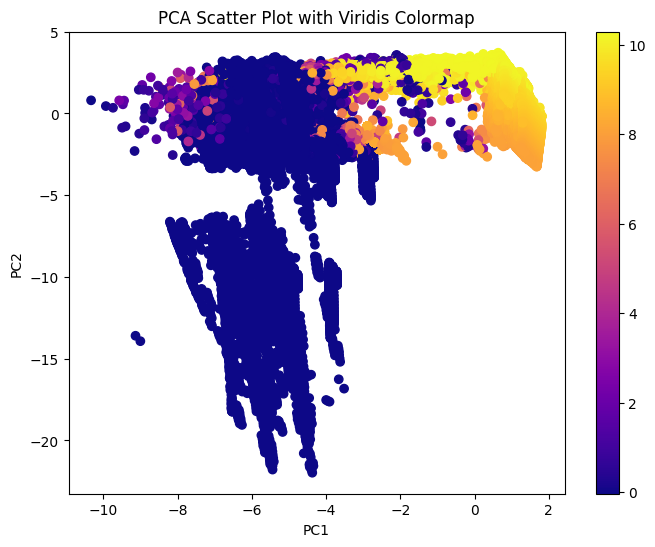

In [26]:

plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=df_numeric['H1'], cmap='plasma')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot with Viridis Colormap')
plt.colorbar()
plt.show()


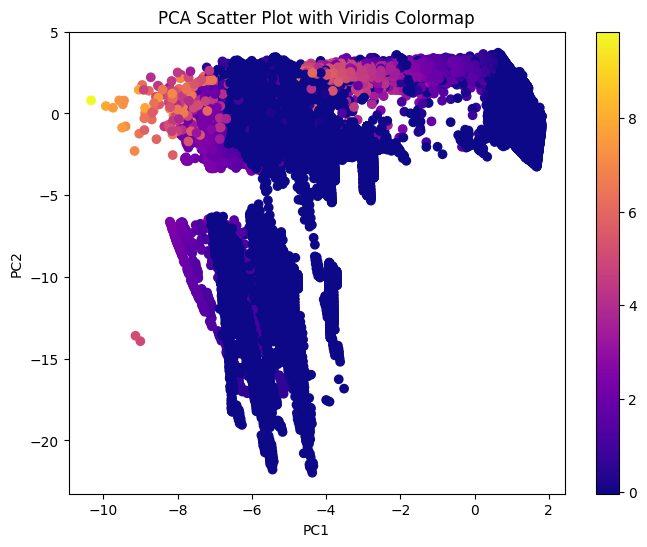

In [27]:

plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=df_numeric['DV_pressure'], cmap='plasma')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot with Viridis Colormap')
plt.colorbar()
plt.show()


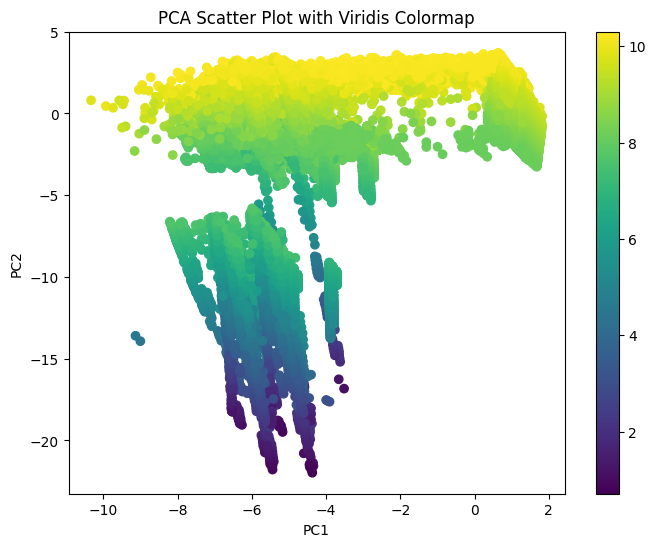

In [23]:

plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=df_numeric['Reservoirs'], cmap='plasma')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot with Viridis Colormap')
plt.colorbar()
plt.show()


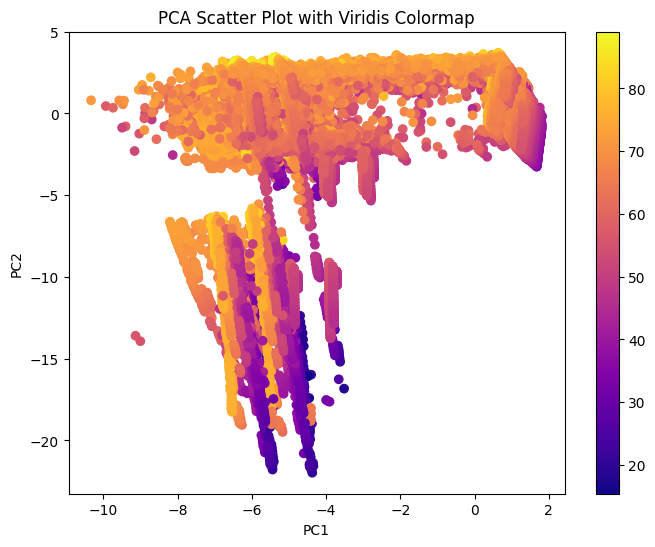

In [28]:

plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=df_numeric['Oil_temperature'], cmap='plasma')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot with Viridis Colormap')
plt.colorbar()
plt.show()


Principal Component Analysis (PCA):
PCA reduces the dimensionality of your data and helps you understand which features contribute most to the variation in your data.

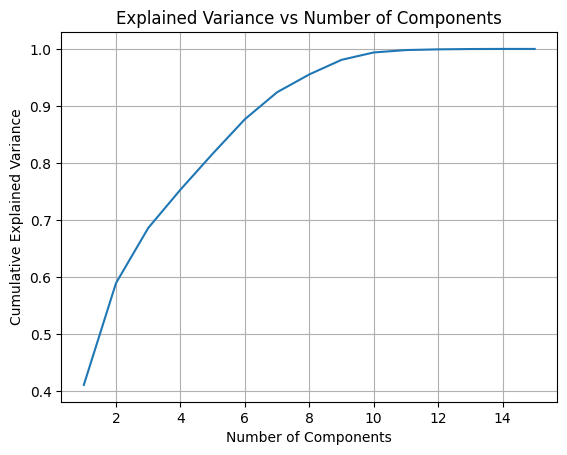

         TP2       TP3        H1  DV_pressure  Reservoirs  Oil_temperature  \
0  -0.386625  0.020615  0.385415    -0.203354    0.021096        -0.134757   
1   0.009817  0.588399  0.117013    -0.046844    0.588433         0.355383   
2   0.078496  0.041422 -0.070749     0.065694    0.041671        -0.013703   
3  -0.110594 -0.137400  0.087218     0.555516   -0.136648         0.547644   
4  -0.001464  0.080418  0.001996    -0.527386    0.079764        -0.034824   
5  -0.089282  0.007965  0.087978     0.185802    0.007409         0.249330   
6   0.052935 -0.128981 -0.082473    -0.064243   -0.129483         0.125928   
7   0.120434  0.046733 -0.085225     0.081684    0.046533        -0.212396   
8   0.012204 -0.232806 -0.077631    -0.564692   -0.232390         0.625997   
9  -0.180244 -0.216014  0.121170    -0.003492   -0.216493        -0.197326   
10  0.685986 -0.009337 -0.282885     0.009568   -0.010816        -0.002703   
11  0.408368 -0.050504  0.297083    -0.028227   -0.051143       

In [10]:
from sklearn.decomposition import PCA

# data must be normalized

# Apply PCA
pca = PCA(n_components=df_numeric.shape[1])
pca.fit(df_scaled)

# Get explained variance ratios
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid()
plt.show()
#  Feature importance based on PCA loading scores
pca_components = pd.DataFrame(pca.components_, columns=df_numeric.columns)
print(pca_components)